# Import all the required libraries

---



In [11]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [12]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [13]:
data = load_data('MARUTI.BO')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1584.699951,1597.000000,1545.349976,1550.750000,1396.650635,100324
1,2010-01-05,1566.000000,1568.650024,1510.050049,1515.599976,1364.993530,264083
2,2010-01-06,1520.250000,1520.250000,1460.000000,1462.599976,1317.260254,364282
3,2010-01-07,1464.949951,1484.000000,1450.050049,1453.849976,1309.379761,231053
4,2010-01-08,1455.000000,1469.800049,1420.300049,1432.849976,1290.466431,264151


In [14]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1584.699951,1597.000000,1545.349976,1550.750000,100324
1,1566.000000,1568.650024,1510.050049,1515.599976,264083
2,1520.250000,1520.250000,1460.000000,1462.599976,364282
3,1464.949951,1484.000000,1450.050049,1453.849976,231053
4,1455.000000,1469.800049,1420.300049,1432.849976,264151


Visualizing Closing Price

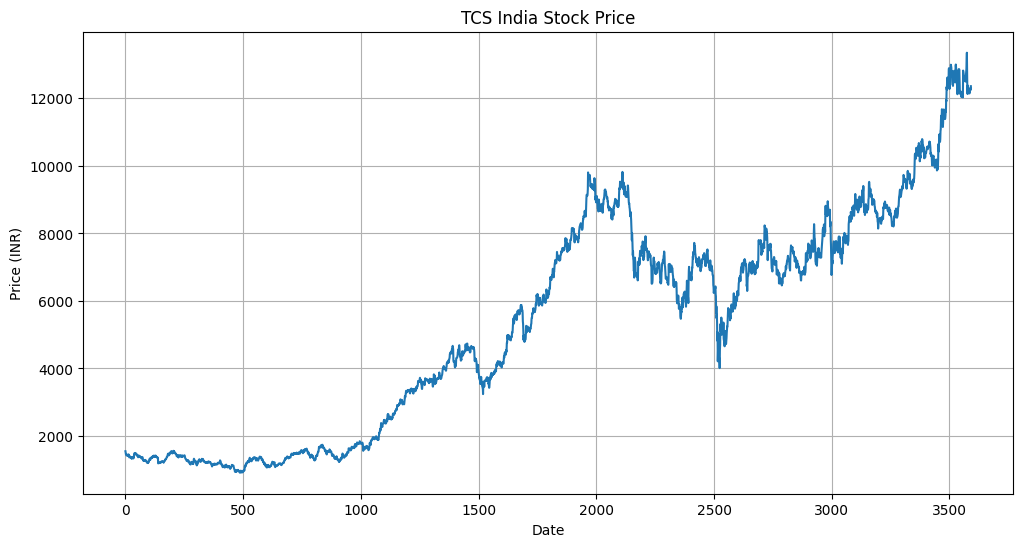

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [16]:
df

,Open,High,Low,Close,Volume
0,1584.699951,1597.000000,1545.349976,1550.750000,100324
1,1566.000000,1568.650024,1510.050049,1515.599976,264083
2,1520.250000,1520.250000,1460.000000,1462.599976,364282
3,1464.949951,1484.000000,1450.050049,1453.849976,231053
4,1455.000000,1469.800049,1420.300049,1432.849976,264151
...,...,...,...,...,...
3587,12244.950195,12245.000000,12177.049805,12216.400391,8917
3588,12310.000000,12337.099609,12185.000000,12297.650391,14344
3589,12290.000000,12370.000000,12256.799805,12302.299805,39083
3590,12302.599609,12347.650391,12225.000000,12246.549805,5345


# Plotting moving averages of 100 day

---



In [17]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3587,12532.066533
3588,12531.681035
3589,12532.144531
3590,12529.407031


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

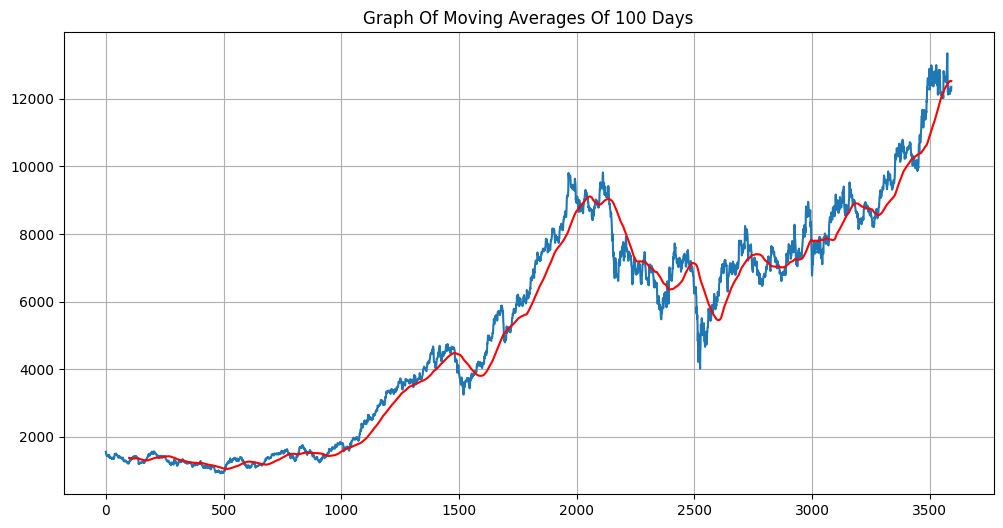

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [19]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3587,11589.105249
3588,11597.612251
3589,11606.991499
3590,11615.459746


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

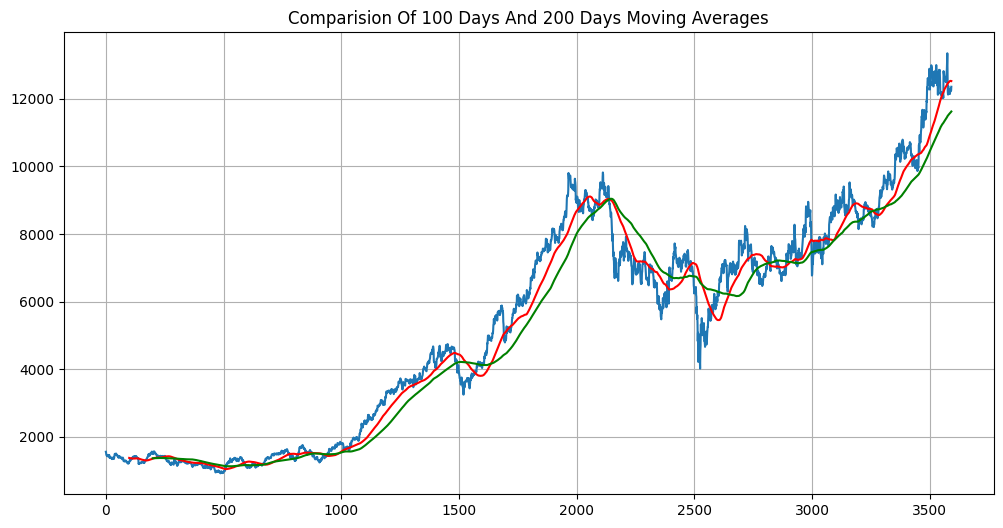

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [21]:
df.shape

(3592, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [22]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2514, 7)
(1078, 7)


In [23]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1584.699951,1597.000000,1545.349976,1550.750000,1396.650635,100324
1,2010-01-05,1566.000000,1568.650024,1510.050049,1515.599976,1364.993530,264083
2,2010-01-06,1520.250000,1520.250000,1460.000000,1462.599976,1317.260254,364282
3,2010-01-07,1464.949951,1484.000000,1450.050049,1453.849976,1309.379761,231053
4,2010-01-08,1455.000000,1469.800049,1420.300049,1432.849976,1290.466431,264151


In [24]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2514,2020-03-19,4899.75,5090.000000,4653.149902,4826.049805,4677.402832,105740
2515,2020-03-20,4929.00,5222.000000,4815.350098,5077.100098,4920.720215,111209
2516,2020-03-23,4698.00,4698.000000,4148.000000,4212.850098,4083.089844,62809
2517,2020-03-24,4398.00,4574.350098,4038.899902,4485.600098,4347.438965,66003
2518,2020-03-25,4305.00,5158.399902,4305.000000,5034.200195,4879.142090,76126


# Using MinMax scaler for normalization of the dataset

---



In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [27]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.07145745],
       [0.06751067],
       [0.06155963],
       ...,
       [0.513519  ],
       [0.52656641],
       [0.49842241]])

In [28]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train.shape

(2414, 100, 1)

# ML Model (LSTM)

---



In [30]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [33]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 37s 342ms/step - loss: 0.0733 - mean_absolute_error: 0.1881
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 26s 337ms/step - loss: 0.0071 - mean_absolute_error: 0.0566
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 345ms/step - loss: 0.0067 - mean_absolute_error: 0.0532
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 342ms/step - loss: 0.0064 - mean_absolute_error: 0.0507
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 26s 337ms/step - loss: 0.0057 - mean_absolute_error: 0.0498
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - loss: 0.0060 - mean_absolute_error: 0.0509
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 25s 330ms/step - loss: 0.0059 - mean_absolute_error: 0.0498
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 43s 360ms/step - loss: 0.0048 - mean_absolute_error: 0.0462
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 318ms/step - loss: 0.0049 - mean_absolute_error: 0.0472
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - loss: 0.0047 - mean_absolute_error: 0.0456
Epoch 11/

In [34]:
model.save('keras_model.h5')

In [35]:
test_close.shape

(1078, 1)

In [36]:
past_100_days = pd.DataFrame(train_close[-100:])

In [37]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [38]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True) # Use concat instead of append to combine DataFrames.

In [39]:
final_df.head()

,0
0,7469.149902
1,7421.500000
2,7718.899902
3,7554.200195
4,7557.500000


In [40]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.37028707],
       [0.36518392],
       [0.39703449],
       ...,
       [0.88790179],
       [0.88193115],
       [0.89380822]])

In [41]:
input_data.shape

(1178, 1)

# Testing the model

---



In [42]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [43]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1078, 100, 1)
(1078,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [44]:
# Making predictions

y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step


In [45]:
y_pred.shape

(1078, 1)

In [46]:
y_test

array([0.0872196 , 0.11410627, 0.02154789, ..., 0.88790179, 0.88193115,
       0.89380822])

In [47]:
y_pred

array([[0.27461207],
       [0.27134696],
       [0.2679303 ],
       ...,
       [0.77201504],
       [0.77503186],
       [0.7782818 ]], dtype=float32)

In [48]:
scaler.scale_

array([0.0001071])

In [49]:
# scale_factor = 1/0.00041967
# y_pred = y_pred * scale_factor
# y_test = y_test * scale_factor

y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)) # Reshape y_pred to 2D
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)) # Reshape y_test to 2D

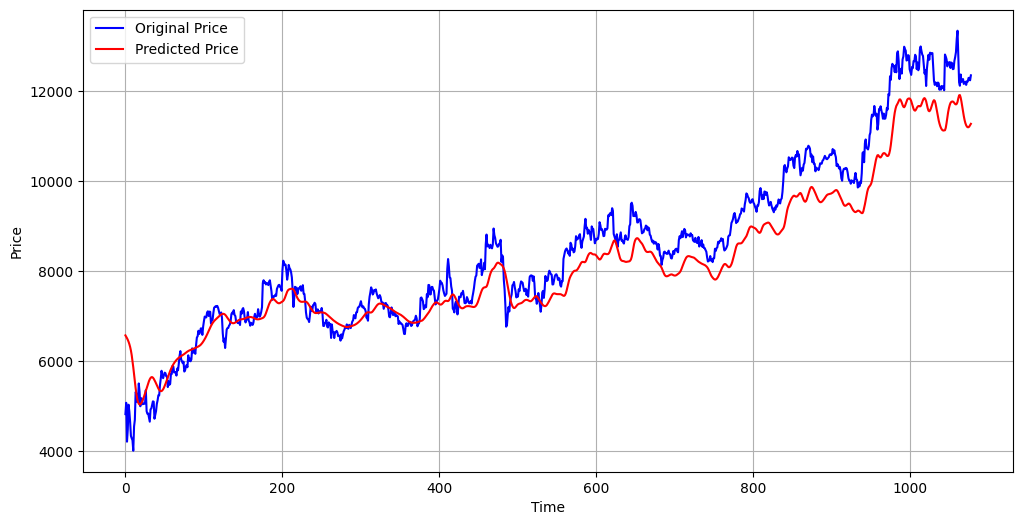

In [50]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [51]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.91%


Calculation of R2 score

In [52]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8986828423479083


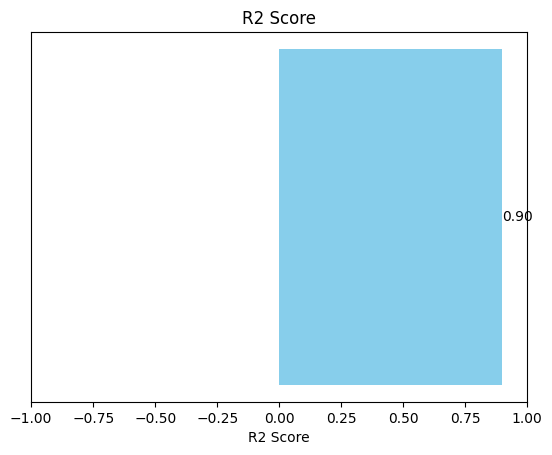

In [53]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

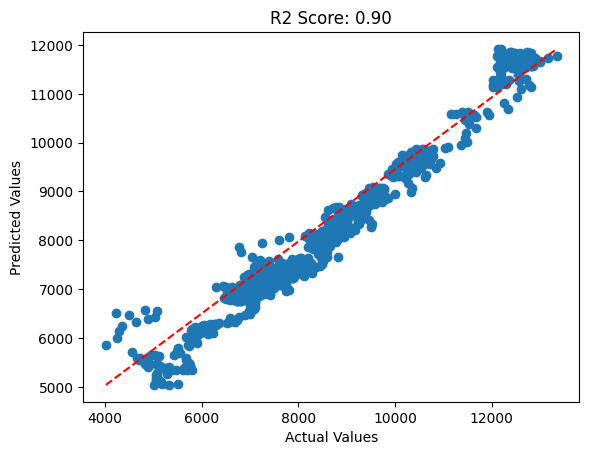

In [54]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
        Date  Predicted_Price
0 2024-08-29     11312.856445
1 2024-08-30     11286.735352
2 2024-08-31     11193.625000
3 2024-09-01     11050.924805
4 2024-09-02     10878.455078
5 2024-09-03     10691.541992
6 2024-09-04     10501.344727
7 2024-09-05     10314.944336
8 2024-09-06     10136.758789
9 2024-09-07      9968.777344


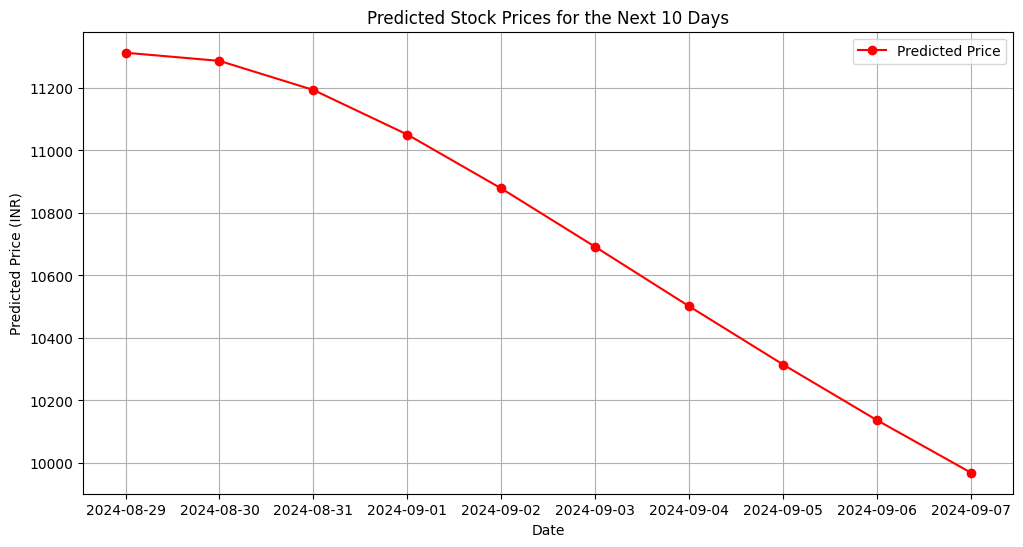

In [55]:
# Get the last 100 days of the training data to predict the next day's price
from datetime import timedelta  # Add this line to import timedelta


last_100_days = data['Close'][-100:].values
last_100_days = last_100_days.reshape(-1, 1)

# Scale the last 100 days data
last_100_days_scaled = scaler.transform(last_100_days)

# Create an empty list to store the predictions
next_10_days_predictions = []

# Reshape last_100_days_scaled to fit the LSTM model input shape
input_data = last_100_days_scaled.reshape((1, last_100_days_scaled.shape[0], 1))

# Predicting the next 10 days
for day in range(10):
    # Get the predicted price for the next day
    predicted_price_scaled = model.predict(input_data)

    # Inverse transform the predicted price to get the actual price
    predicted_price = scaler.inverse_transform(predicted_price_scaled)

    # Append the predicted price to the list
    next_10_days_predictions.append(predicted_price[0][0])

    # Update the input_data with the new predicted price
    # Remove the first value and append the predicted price at the end
    input_data = np.append(input_data[:, 1:, :], predicted_price_scaled.reshape(1, 1, 1), axis=1) # Reshape predicted_price_scaled to have the same dimensions as input_data[:,1:,:]

# Get the last date from the original dataset
last_date = data['Date'].iloc[-1]

# Generate the next 10 days' dates
next_10_days_dates = [last_date + timedelta(days=i) for i in range(1, 11)]

# Create a DataFrame to display the predicted prices with dates
predicted_next_10_days_df = pd.DataFrame({'Date': next_10_days_dates, 'Predicted_Price': next_10_days_predictions})

# Display the predictions
print(predicted_next_10_days_df)

# Plotting the predicted prices for the next 10 days
plt.figure(figsize=(12, 6))
plt.plot(predicted_next_10_days_df['Date'], predicted_next_10_days_df['Predicted_Price'], marker='o', linestyle='-', color='r', label='Predicted Price')
plt.title('Predicted Stock Prices for the Next 10 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Price (INR)')
plt.grid(True)
plt.legend()
plt.show()